# Projekt 2 Statystyka w Sztucznej inteligencji 

## Importy

In [71]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
import numpy as np


import torch
import torch.optim as optim
from torch import nn
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
device


'cuda:0'

### Dane

In [72]:
df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv') 

X = df_train.drop(columns=['activity'])
y = df_train['activity']

X_test = df_test


## Feature Selection

### XGBoost feature importance

In [73]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', objective='binary:logistic')
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

         Feature  Importance
605      TpiPC10   84.735115
570  SlogP_VSA11   63.310383
488       SssCH2   43.652466
351       MATS2i   39.310600
613       nFRing   35.997448
237      AATSC2m   28.225418
561     SMR_VSA7   23.712511
642        MWC08   23.169355
591         MPC8   19.374914
4    nBridgehead   18.426916
614      n9FRing   18.233984
497        SaasN   18.225832
597        piPC3   15.958502
132       ATSC0d   15.868607
193     ATSC8are   15.851509
508       nHBDon   15.779584
35         ATS8v   15.706089
444       Xpc-6d   15.301539
60       AATS7dv   14.963341
168      ATSC1se   14.735888
272    AATSC6are   14.622105
176      ATSC0pe   14.558662
141       ATSC0Z   14.325106
514         TIC1   13.530922
590         MPC7   13.071249
647        SRW08   13.017567
31         ATS2v   12.890843
10        ATS6dv   12.337931
43        ATS8pe   12.266619
50         ATS7p   12.247775
548    PEOE_VSA4   11.527971
557   PEOE_VSA13   11.442571
554   PEOE_VSA10   11.217063
626         GG

c:\Install\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Install\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Importance'>

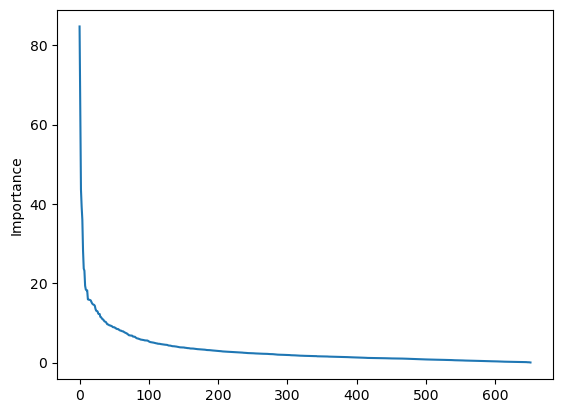

In [74]:
importance_dict = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df[:40])

sns.lineplot(importance_df['Importance'].reset_index(drop=True))

In [75]:
importance_df.iloc[:100]["Feature"]

605        TpiPC10
570    SlogP_VSA11
488         SssCH2
351         MATS2i
613         nFRing
          ...     
634           JGI6
537          ZMIC1
631           JGI3
313         MATS4m
57         AATS4dv
Name: Feature, Length: 100, dtype: object

### R Korelacja

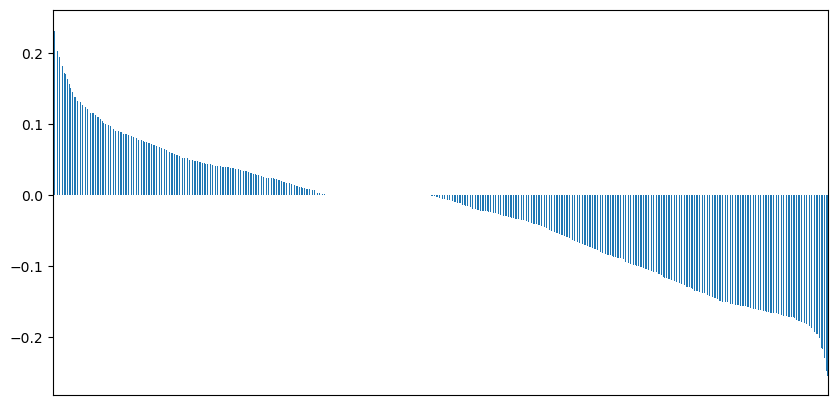

In [76]:


importances_corr_r = r_regression(X, y)

importances_corr_r = pd.Series(importances_corr_r, index=X.columns)
importances_corr_r = importances_corr_r.sort_values(ascending=False)

importances_corr_r.plot.bar(figsize=(10, 5))
plt.xticks([])
plt.show()

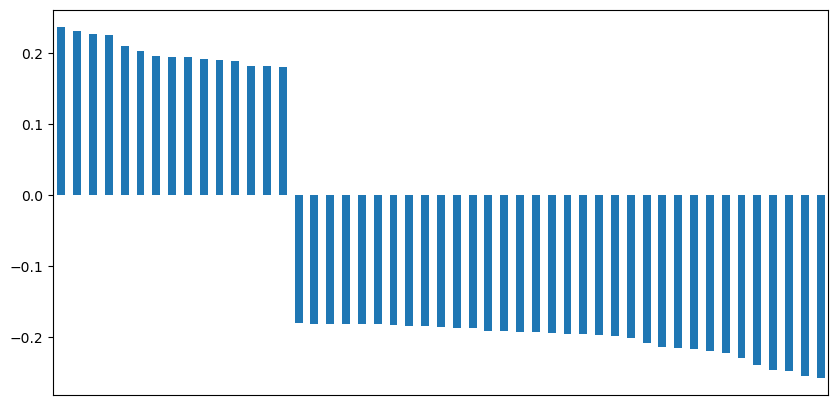

In [77]:
importances_corr_r_cut = importances_corr_r[importances_corr_r.abs() > 0.18]
importances_corr_r_cut.plot.bar(figsize=(10, 5))
plt.xticks([])
plt.show()

In [78]:
importances_corr_r_cut.reset_index().rename(columns={'index': 'Feature'})

,Feature,0
0,ATSC2d,0.236160
1,AATSC1d,0.231743
2,JGI3,0.226694
3,JGI6,0.225336
4,MATS2i,0.209917
5,MATS1d,0.202782
6,AATSC2d,0.196231
7,MATS2p,0.195224
8,ATSC2i,0.194157
9,AATSC2i,0.191746


In [79]:
combined_features = pd.concat([importance_df.iloc[:80]["Feature"], importances_corr_r_cut.reset_index().rename(columns={'index': 'Feature'})['Feature']], ignore_index=True)

combined_features = combined_features.drop_duplicates().reset_index(drop=True)
combined_features

0          TpiPC10
1      SlogP_VSA11
2           SssCH2
3           MATS2i
4           nFRing
          ...     
114           NaaO
115         NssCH2
116     SlogP_VSA5
117    EState_VSA5
118       n9FHRing
Name: Feature, Length: 119, dtype: object

## Przewidywanie typu zmiennej
Z racji iż niektóre zmienne, które posiadały int64 wcale nie będąc wartością całkowitą ale kategoryczną znajdujemy +- które mogłybybyć kategoryczne

([], [])

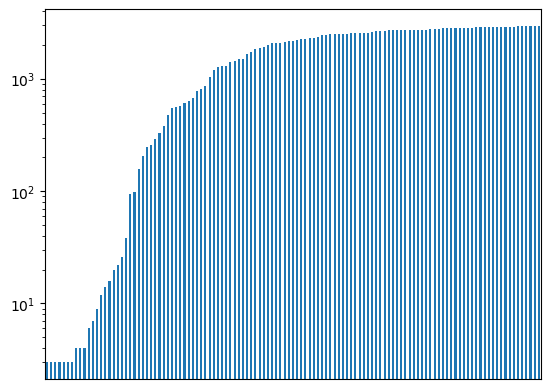

In [128]:
unique_values_count = X[combined_features].nunique().sort_values()

unique_values_count.plot(kind='bar')
plt.semilogy()
plt.xticks([])

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X[combined_features], y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = (unique_values_count < 30).index 
numerical_features = (unique_values_count > 30).index 


In [83]:

# numerical transform
min_max_scaler = MinMaxScaler()
pipeline = Pipeline([("scaling", min_max_scaler)])
num_transformer = ColumnTransformer([("numerical transform", pipeline, numerical_features)],
                                        verbose_feature_names_out=False)

# categorical transform
labels_encoder = RareLabelEncoder(tol=0.01, 
                                  n_categories=0)
one_hot_encoder = OneHotEncoder(drop="first", 
                                sparse_output= False)

category_pipeline = Pipeline([("rare_labels", labels_encoder),
                              ("one_hot_encoder", one_hot_encoder)])

category_transformer = ColumnTransformer([("category transform", category_pipeline, categorical_features)],
                                            verbose_feature_names_out=False)


X_train_transformed_num = num_transformer.fit_transform(X_train, y_train)
X_valid_transformed_num = num_transformer.transform(X_valid)
X_test_transformed_num = num_transformer.transform(X_test)

X_train_transformed_cat = category_transformer.fit_transform(X_train.apply(lambda col: col.astype(str)), y_train)
X_valid_transformed_cat = category_transformer.transform(X_valid.apply(lambda col: col.astype(str)))
X_test_transformed_cat = category_transformer.transform(X_test.apply(lambda col: col.astype(str)))

X_train_transformed = np.concatenate([X_train_transformed_num, X_train_transformed_cat], axis=1)
X_valid_transformed = np.concatenate([X_valid_transformed_num, X_valid_transformed_cat], axis=1)
X_test_transformed = np.concatenate([X_test_transformed_num, X_test_transformed_cat], axis=1)

X_train_tensor = torch.tensor(X_train_transformed, device=device, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid_transformed, device=device, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_transformed, device=device, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.to_numpy(), device=device)
y_valid_tensor = torch.tensor(y_valid.to_numpy(), device='cpu')


## NN training

In [110]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Dropout(p=0.8),

            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Dropout(p=0.8),

            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Dropout(p=0.8),
        )

        self.decison_head =  nn.Sequential(            
            nn.Linear(4096 + input_size, 2)  
            )

    def forward(self, x):
        x_net = self.net(x)
        x = torch.concatenate((x, x_net), axis = 1)
        return self.decison_head(x)
    


In [111]:

def train(model, X, y, X_val=None, y_val=None, epochs=10, learning_rate=0.001, batch_size=128):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    train_loss = []
    valid_loss = []
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X.size(0))
        sum_loss = 0
        for i in range(0, X.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X[indices], y[indices]

            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.detach()
        train_loss.append(sum_loss.cpu()  * batch_size / X.size(0))

        if X_val is None:
            continue
        model.eval()
        with torch.no_grad():
            outputs = model(X_val)
            _, preds = torch.max(outputs, 1)
            valid_loss.append(criterion(outputs.cpu(), y_val))
            acc = accuracy_score(y_val.numpy(), preds.cpu().numpy())
            print(f"'epoch {epoch} accuracy: {acc:.4f}")

    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.show()


In [121]:
model = SimpleNN(X_train_tensor.shape[1])
model = model.to(device)

'epoch 0 accuracy: 0.6936
'epoch 1 accuracy: 0.7743
'epoch 2 accuracy: 0.8098
'epoch 3 accuracy: 0.8085
'epoch 4 accuracy: 0.8016
'epoch 5 accuracy: 0.7866
'epoch 6 accuracy: 0.8235
'epoch 7 accuracy: 0.8181
'epoch 8 accuracy: 0.8536
'epoch 9 accuracy: 0.8304
'epoch 10 accuracy: 0.8523
'epoch 11 accuracy: 0.8386


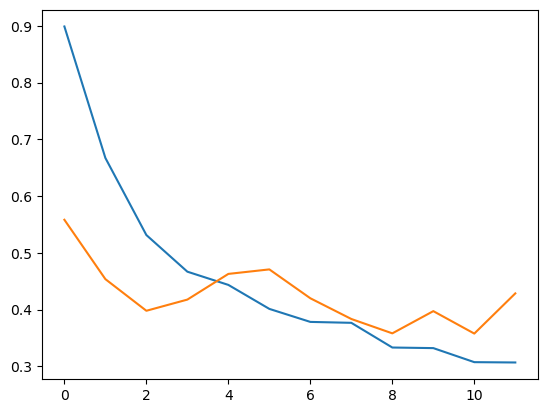

In [122]:
train(model, X_train_tensor, y_train_tensor, X_valid_tensor, y_valid_tensor, epochs=12, learning_rate=5e-6, batch_size=128)

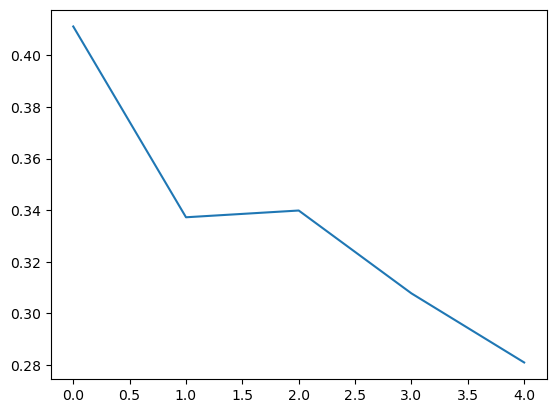

In [123]:
train(model, torch.concat((X_train_tensor,X_valid_tensor.cuda()),axis=0), torch.concat((y_train_tensor,y_valid_tensor.cuda())), epochs=5,learning_rate=7e-5, batch_size=128)

## Evaluation

In [124]:
with torch.no_grad():
    predictions = torch.max(model(X_test_tensor), 1)[1].cpu().numpy()

In [125]:
predictions.sum()

781

In [126]:
results = pd.DataFrame({'ID' : X_test['ID'],
              'activity' : predictions})

In [127]:
results.to_csv('result_empire_return_of_the_jedi.csv', index=False)